# Spotify & Billboard Data Visualization

## Imports

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Load Dataframes

In [65]:
billboard_weekly_df = pd.read_parquet('dataset_cleaned/billboard_weekly.parquet')
billboard_weekly_df

,date,rank,song,artist,last-week,peak-rank,weeks-on-board,song_base,contributors_title,flag_versioned,removed_suffix,artist_base,artist_all,year,exposure_week,top10_flag,top1_flag
0,2010-01-02,1,TiK ToK,Ke$ha,2.0,1.0,11.0,tik tok,[],False,None,keha,[keha],2010,100,1,1
1,2010-01-02,2,Empire State Of Mind,Jay-Z + Alicia Keys,1.0,1.0,15.0,empire state of mind,[],False,None,jay-z alicia keys,[jay-z alicia keys],2010,99,1,0
2,2010-01-02,3,Bad Romance,Lady Gaga,3.0,2.0,8.0,bad romance,[],False,None,lady gaga,[lady gaga],2010,98,1,0
3,2010-01-02,4,Replay,Iyaz,4.0,4.0,18.0,replay,[],False,None,iyaz,[iyaz],2010,97,1,0
4,2010-01-02,5,Fireflies,Owl City,5.0,1.0,18.0,fireflies,[],False,None,owl city,[owl city],2010,96,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61895,2021-11-06,96,To Be Loved By You,Parker McCollum,NaN,96.0,1.0,to be loved by you,[],False,None,parker mccollum,[parker mccollum],2021,5,0,0
61896,2021-11-06,97,Ain't Shit,Doja Cat,NaN,24.0,14.0,ain't shit,[],False,None,doja cat,[doja cat],2021,4,0,0
61897,2021-11-06,98,Life Goes On,Oliver Tree,NaN,91.0,2.0,life goes on,[],False,None,oliver tree,[oliver tree],2021,3,0,0
61898,2021-11-06,99,Come Through,H.E.R. Featuring Chris Brown,NaN,64.0,16.0,come through,[],False,None,her,"[her, chris brown]",2021,2,0,0


In [66]:
billboard_yearly_df = pd.read_parquet('dataset_cleaned/billboard_yearly.parquet')
billboard_yearly_df

,song_base,artist_base,year,weeks_top10_year,weeks_at_1_year,best_rank_year,avg_rank_year,exposure_year,weeks_in_hot100_year,first_seen_year,weeks_to_peak_year
0,hey soul sister,train,2010,19,0,3,16.74,3623,43,2010-01-02,14
1,need you now,lady antebellum,2010,15,0,2,18.02,3485,42,2010-01-02,11
2,breakeven,the script,2010,0,0,12,35.66,2679,41,2010-01-02,19
3,airplanes,bob,2010,17,0,2,12.27,2662,30,2010-05-01,5
4,omg,usher,2010,17,4,1,13.67,2620,30,2010-04-17,4
...,...,...,...,...,...,...,...,...,...,...,...
7052,clear da air,moneybagg yo,2021,0,0,100,100.00,1,1,2021-05-08,0
7053,crocodile teeth,nicki minaj skillibeng,2021,0,0,100,100.00,1,1,2021-05-29,0
7054,rare,nas,2021,0,0,100,100.00,1,1,2021-08-21,0
7055,still chose you,the kid laroi,2021,0,0,100,100.00,1,1,2021-08-07,0


In [ ]:
spotify_df = pd.read_parquet("dataset_cleaned/spotify.parquet")
spotify_df

,year,track_id,track_name,track_popularity,album,artist_name,artist_genres,danceability,energy,loudness,...,tempo,duration_ms,time_signature,key,song_base,contributors_title,flag_versioned,removed_suffix,artist_base,artist_all
0,2010,7BqBn9nzAq8spo5e7cZ0dJ,Just the Way You Are,85,Doo-Wops & Hooligans,Bruno Mars,"['dance pop', 'pop']",0.635,0.841,-5.379,...,109.021,220734,4,5,just the way you are,[],False,None,bruno mars,[bruno mars]
1,2010,15JINEqzVMv3SvJTAXAKED,Love The Way You Lie,85,Recovery,Eminem,"['detroit hip hop', 'hip hop', 'rap']",0.749,0.925,-5.034,...,86.989,263373,4,10,love the way you lie,[],False,None,eminem,[eminem]
2,2010,0SiywuOBRcynK0uKGWdCnn,Bad Romance,84,The Fame Monster (Deluxe Edition),Lady Gaga,"['art pop', 'dance pop', 'pop']",0.696,0.921,-3.755,...,119.001,294573,4,0,bad romance,[],False,None,lady gaga,[lady gaga]
3,2010,2GYHyAoLWpkxLVa4oYTVko,Alors on danse - Radio Edit,79,Cheese,Stromae,"['belgian pop', 'g-house']",0.791,0.590,-9.206,...,119.951,206067,4,1,alors on danse,[],True,- radio edit,stromae,[stromae]
4,2010,0HPD5WQqrq7wPWR7P7Dw1i,TiK ToK,85,Animal (Expanded Edition),Kesha,"['dance pop', 'pop']",0.755,0.837,-2.718,...,120.028,199693,4,2,tik tok,[],False,None,kesha,[kesha]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,2023,0HD8mbiPjp3o94X3EaZp0o,exes,56,exes,Tate McRae,['pop'],0.838,0.569,-6.324,...,136.965,159400,4,5,exes,[],False,None,tate mcrae,[tate mcrae]
1396,2023,3XB5uhhlYSnkxpSihkNQwh,QLONA,79,MAÑANA SERÁ BONITO (BICHOTA SEASON),KAROL G,"['reggaeton', 'reggaeton colombiano', 'trap la...",0.842,0.756,-7.409,...,169.925,172798,4,7,qlona,[],False,None,karol g,[karol g]
1397,2023,4sx6NRwL6Ol3V6m9exwGlQ,LOVE AGAIN,69,LOVE AGAIN,The Kid LAROI,['australian hip hop'],0.662,0.398,-6.691,...,107.001,145850,4,11,love again,[],False,None,the kid laroi,[the kid laroi]
1398,2023,2Zo1PcszsT9WQ0ANntJbID,Feather,91,emails i cant send fwd:,Sabrina Carpenter,['pop'],0.787,0.686,-4.370,...,123.510,185553,4,6,feather,[],False,None,sabrina carpenter,[sabrina carpenter]


In [68]:
join_df = pd.read_parquet("dataset_cleaned/spotify_billboard_joined.parquet")
join_df

,year,track_id,track_name,track_popularity,album,artist_name,artist_genres,danceability,energy,loudness,...,weeks_at_1_year,best_rank_year,avg_rank_year,exposure_year,weeks_in_hot100_year,first_seen_year,weeks_to_peak_year,matched_primary,fallback_artist_matched,on_billboard_year
0,2010,7BqBn9nzAq8spo5e7cZ0dJ,Just the Way You Are,85,Doo-Wops & Hooligans,Bruno Mars,"['dance pop', 'pop']",0.635,0.841,-5.379,...,4.0,1.0,8.52,1942.0,21.0,2010-08-07,8.0,True,None,True
1,2010,15JINEqzVMv3SvJTAXAKED,Love The Way You Lie,85,Recovery,Eminem,"['detroit hip hop', 'hip hop', 'rap']",0.749,0.925,-5.034,...,7.0,1.0,10.64,2259.0,25.0,2010-07-10,3.0,True,None,True
2,2010,0SiywuOBRcynK0uKGWdCnn,Bad Romance,84,The Fame Monster (Deluxe Edition),Lady Gaga,"['art pop', 'dance pop', 'pop']",0.696,0.921,-3.755,...,0.0,2.0,17.26,2261.0,27.0,2010-01-02,2.0,True,None,True
3,2010,2GYHyAoLWpkxLVa4oYTVko,Alors on danse - Radio Edit,79,Cheese,Stromae,"['belgian pop', 'g-house']",0.791,0.590,-9.206,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,False,stromae,False
4,2010,0HPD5WQqrq7wPWR7P7Dw1i,TiK ToK,85,Animal (Expanded Edition),Kesha,"['dance pop', 'pop']",0.755,0.837,-2.718,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,False,kesha,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2021,2plRom0urixt6BE8t7kOhQ,Girl From Rio,55,Girl From Rio,Anitta,"['funk pop', 'funk rj', 'pagode baiano', 'pop'...",0.692,0.639,-6.717,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,False,anitta,False
1196,2021,0z8hI3OPS8ADPWtoCjjLl6,Summer of Love (Shawn Mendes & Tainy),72,Summer Of Love,Shawn Mendes,"['canadian pop', 'pop', 'viral pop']",0.776,0.808,-4.501,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,False,shawn mendes,False
1197,2021,0eu4C55hL6x29mmeAjytzC,Life Goes On,74,"Ugly is Beautiful: Shorter, Thicker & Uglier (...",Oliver Tree,['alternative hip hop'],0.700,0.490,-5.187,...,0.0,91.0,94.50,13.0,2.0,2021-10-23,0.0,True,None,True
1198,2021,3nY8AqaMNNHHLYV4380ol0,Dick (feat. Doja Cat),67,Dick (feat. Doja Cat),StarBoi3,['viral rap'],0.647,0.608,-6.831,...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,False,starboi3,False


## First Problem: Longevity of Hits

In this section, we will explore the longevity of songs in the Billboad charts. This will help us understand how to plan marketing strategies. Do hits stay in the charts for a long time, or are songs quickly forgotten?

First plot: shows us the median number of weeks a song stays in the charts per year. This will allow us to have an idea on how long does a song cycles in and out of the charts.

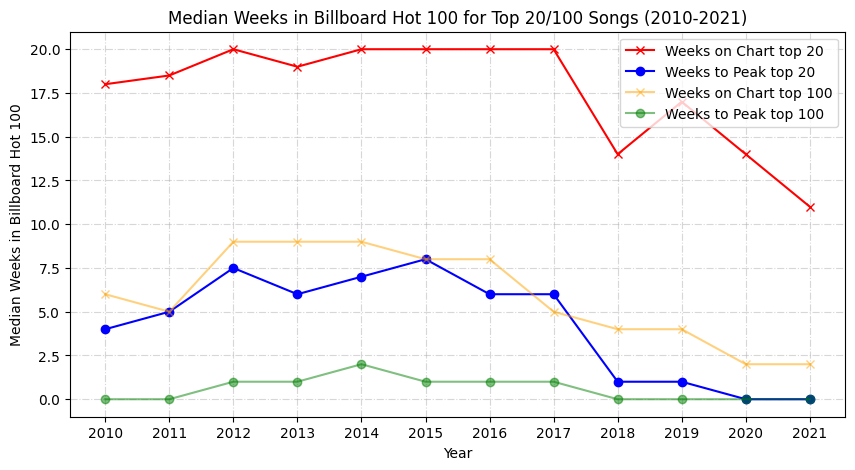

In [69]:
top20_df = billboard_yearly_df[billboard_yearly_df["best_rank_year"] <= 20]
median_weeks_agg_cols = {
    "weeks_in_hot100_year": "median",
    "weeks_to_peak_year": "median",
}
median_weeks_top20 = top20_df.groupby("year").agg(median_weeks_agg_cols)
median_weeks_top20.rename(columns={"weeks_in_hot100_year": "median_weeks_on_chart", "weeks_to_peak_year": "median_weeks_to_peak"}, inplace=True)
median_weeks_top20.reset_index("year", inplace=True)
median_weeks_top20

# do the same but for top 100
top100_df = billboard_yearly_df[billboard_yearly_df["best_rank_year"] <= 100]
median_weeks_top100 = top100_df.groupby("year").agg(median_weeks_agg_cols)
median_weeks_top100.rename(columns={"weeks_in_hot100_year": "median_weeks_on_chart", "weeks_to_peak_year": "median_weeks_to_peak"}, inplace=True)
median_weeks_top100.reset_index("year", inplace=True)
median_weeks_top100

median_weeks_fig = plt.figure(figsize=(10, 5)) # wait... we can assign a figure to a variable???
plt.plot(median_weeks_top20["year"], median_weeks_top20["median_weeks_on_chart"], marker='x', color='red', label='Weeks on Chart top 20')
plt.plot(median_weeks_top20["year"], median_weeks_top20["median_weeks_to_peak"], marker='o', color='blue', label='Weeks to Peak top 20')
plt.plot(median_weeks_top100["year"], median_weeks_top100["median_weeks_on_chart"], marker='x', color='orange', label='Weeks on Chart top 100', alpha=0.5) # could have been on another plot
plt.plot(median_weeks_top100["year"], median_weeks_top100["median_weeks_to_peak"], marker='o', color='green', label='Weeks to Peak top 100', alpha=0.5) # could have been on another plot
plt.legend()
plt.xlabel('Year')
plt.ylabel('Median Weeks in Billboard Hot 100')
plt.title('Median Weeks in Billboard Hot 100 for Top 20/100 Songs (2010-2021)')
plt.grid(True, which='both', linestyle='-.', alpha=0.5, aa=True)
plt.xticks(median_weeks_top20["year"])
plt.show()

This one is to check if the slow-burning hist tend to outlast more than the fast-rising ones.

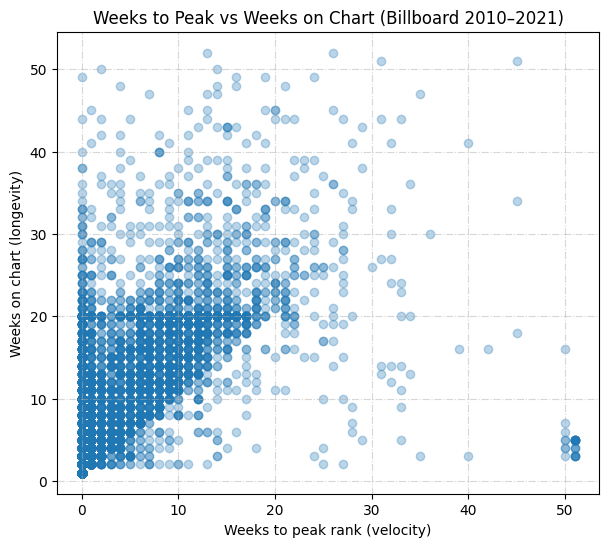

In [70]:
plt.figure(figsize=(7,6))
plt.scatter(billboard_yearly_df["weeks_to_peak_year"], 
            billboard_yearly_df["weeks_in_hot100_year"], 
            alpha=0.3)

plt.title("Weeks to Peak vs Weeks on Chart (Billboard 2010–2021)")
plt.xlabel("Weeks to peak rank (velocity)")
plt.ylabel("Weeks on chart (longevity)")
plt.grid(True, linestyle="-.", alpha=0.5)
plt.show()

The next one shows if the time it takes to reach the peak changes over the years.

<Figure size 1000x500 with 0 Axes>

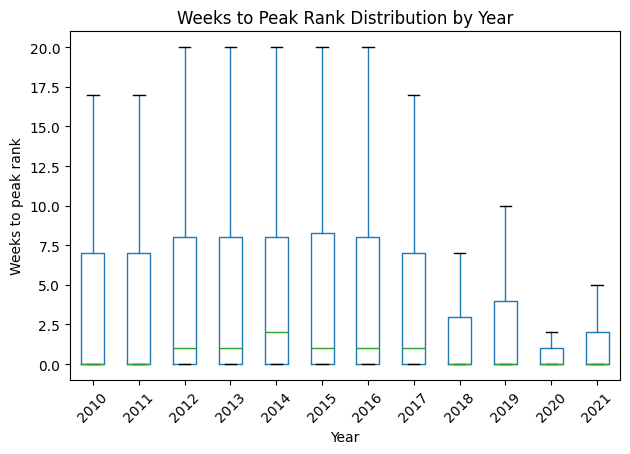

In [83]:
plt.figure(figsize=(10,5))
billboard_yearly_df.boxplot(column="weeks_to_peak_year", by="year", grid=False, showfliers=False)
plt.title("Weeks to Peak Rank Distribution by Year")
plt.suptitle("")
plt.xlabel("Year")
plt.ylabel("Weeks to peak rank")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Second Problem: Spotify (global) vs Billboard (US)

This part will be useful since we are a fictional company that helps global labels as well as US-based ones. If we are a global one, we want to know if global songs even matters in the US (Billboard). If we are a US-based label, we want to know which global hit fails to enter the US market.

First, we will visualize the coverage. This will give us an idea if spotify global hits are relevant in the US.

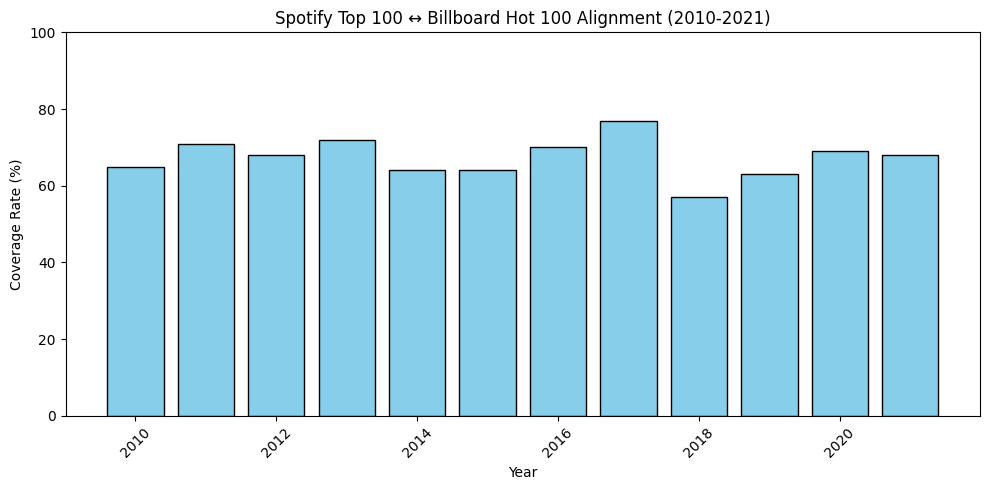

In [ ]:
import matplotlib.pyplot as plt

coverage = join_df.groupby("year")["on_billboard_year"].mean().reset_index(name="coverage_rate")
coverage["coverage_rate"] = (coverage["coverage_rate"]*100).round(1)

plt.figure(figsize=(10,6))
plt.bar(coverage["year"], coverage["coverage_rate"], color="skyblue", edgecolor="black")
plt.title("Spotify Top 100 ↔ Billboard Hot 100 Alignment (2010-2021)")
plt.xlabel("Year")
plt.ylabel("Coverage Rate (%)")
plt.xticks(rotation=45)
plt.ylim(0, 100)
plt.tight_layout()
plt.show()

Since there is a pretty high coverage, next, we want to know if the popularity on spotify correlates with the rank on billboard. For this, we will take the best_rank_year for the billboard rank since we want to know the absolute best and the track_popularity for spotify.

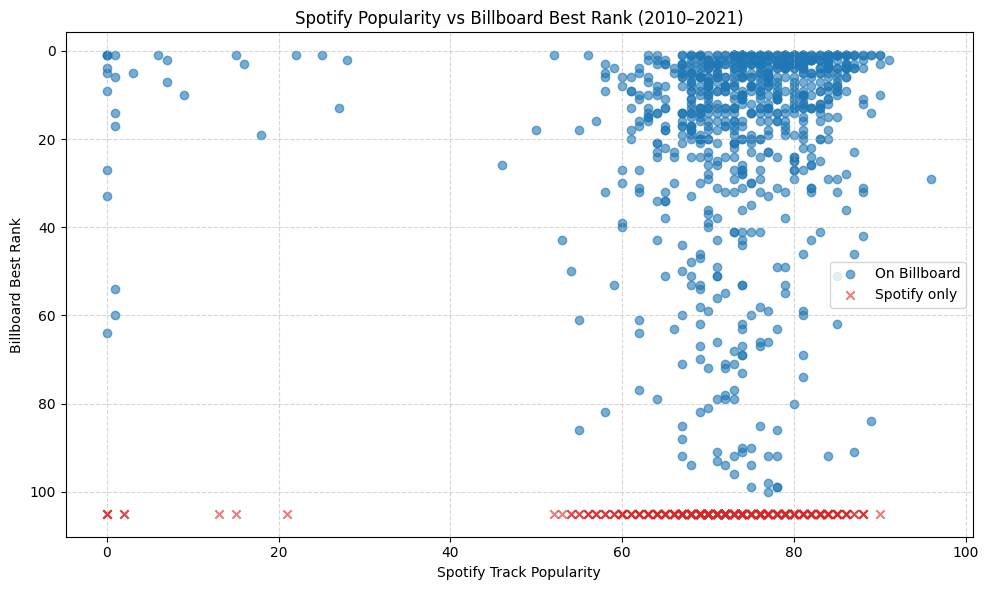

In [80]:
plt.figure(figsize=(10,6))

# joined tracks
mask = join_df["on_billboard_year"]

plt.scatter(
    join_df.loc[mask, "track_popularity"],
    join_df.loc[mask, "best_rank_year"],
    c="tab:blue", alpha=0.6, label="On Billboard"
)

# not on Billboard
plt.scatter(
    join_df.loc[~mask, "track_popularity"],
    [105] * sum(~mask),
    c="tab:red", alpha=0.6, marker="x", label="Spotify only"
)

plt.title("Spotify Popularity vs Billboard Best Rank (2010–2021)")
plt.xlabel("Spotify Track Popularity")
plt.ylabel("Billboard Best Rank")
plt.gca().invert_yaxis()
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


If we want a list of songs that are popular on spotify but doesn't fit the billboard for a year, here it is.

In [87]:
def spotify_outliers(df, year, n=10): # filter for the year for songs that aren't on the billboard and sort by track popularity
    sub = df[(df["year"] == year)].copy()
    outliers = sub[~sub["on_billboard_year"]].sort_values("track_popularity", ascending=False)
    return outliers[["track_name","artist_name","track_popularity","artist_genres"]].head(n)

spotify_outliers(join_df, 2010, n=10)


,track_name,artist_name,track_popularity,artist_genres
4,TiK ToK,Kesha,85,"['dance pop', 'pop']"
11,Talking to the Moon,Bruno Mars,83,"['dance pop', 'pop']"
13,Danza Kuduro,Don Omar,82,"['latin hip hop', 'puerto rican pop', 'reggaet..."
3,Alors on danse - Radio Edit,Stromae,79,"['belgian pop', 'g-house']"
20,Cooler Than Me - Single Mix,Mike Posner,79,"['dance pop', 'pop', 'pop dance', 'pop rap']"
22,What You Know,Two Door Cinema Club,76,"['indie rock', 'indietronica', 'irish rock', '..."
32,Your Love Is My Drug,Kesha,72,"['dance pop', 'pop']"
37,The Time (Dirty Bit),Black Eyed Peas,71,"['dance pop', 'pop', 'pop rap']"
38,Like A G6,Far East Movement,70,"['asian american hip hop', 'dance pop', 'pop r..."
41,Hot,INNA,70,"['dance pop', 'romanian house', 'romanian pop']"


See if there are any genres that are outlires

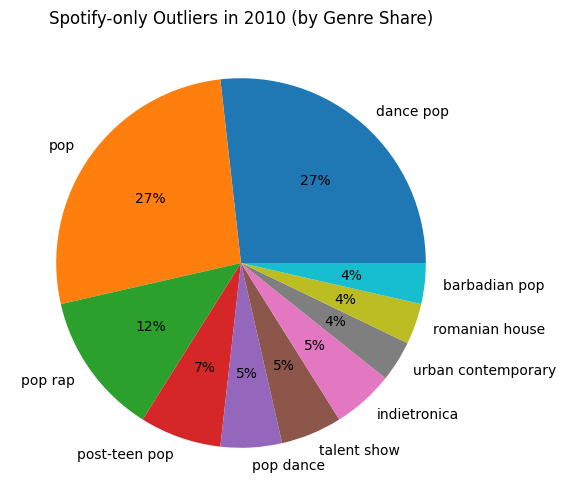

In [109]:
def spotify_outlier_genres_pie(df, year, top_n_genres=10):
    sub = df[(df["year"] == year) & (~df["on_billboard_year"])].copy()
    outliers = sub.sort_values("track_popularity", ascending=False)

    # turning the list string into a list so that we can explode it later
    # else the parts of the pie chart will be based on combined genres
    outliers["artist_genres"] = outliers["artist_genres"].astype(str).str.strip("[]").str.replace("'", "").str.split(",")

    # explode into individual genres
    exploded = outliers.explode("artist_genres")
    exploded["artist_genres"] = exploded["artist_genres"].str.strip()  # trim spaces

    genre_counts = exploded["artist_genres"].value_counts().head(top_n_genres)

    genre_counts.plot(kind="pie", autopct="%1.0f%%", figsize=(6,6), ylabel="")
    plt.title(f"Spotify-only Outliers in {year} (by Genre Share)")
    plt.show()

spotify_outlier_genres_pie(join_df, 2010)